# Prosper loan Data Exploration
## by Ibe Chukwudi

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate  and many others

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# loading the data set into pandas
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.shape

(113937, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Dataset Structure

> The dataset  has 113,937 loans with 81 various characteristics of each user application

### Feature(s) of interest in your dataset

> I am intrested in the factors that mosts inflences a cutomers  "LoanStatus" which could lead to a Completed loan to help an  investor pick the right loan to fund

### Dataset That will help support my investigation 

> I expect that a high StatedMonthlyIncome,MonthlyLoanPayment,Term  will be a factor that will strongly influece an high ProsperScore and lead to a completed loan

> Below are my columns of intrest

- **ProsperScore**:A custom risk score built using historical Prosper data.The score ranges from 1-10, with 10 being the best, or lowest risk score
- **StatedMonthlyIncome**:The monthly income the borrower stated at the time the listing was created.
- **EmploymentStatus**:The employment status of the borrower at the time they posted the listing.
- **Term**:The length of the loan expressed in months.
- **LoanOriginalAmount**:The origination amount of the loan.
- **BorrowerAPR**:The Borrower's Annual Percentage Rate (APR) for the loan.
- **ListingNumber**:The number that uniquely identifies the listing to the public as displayed on the website.
- **ListingCategory**:The category of the listing that the borrower selected when posting their listing
         0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student           Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green  n            Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19          - Vacation, 20 - Wedding Loans
- **TotalProsperLoans**:Number of Prosper loans the borrower at the time they created this listing
- **LoanStatus**:The current status of the loan
- **ProsperRating (Alpha)**:The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
- **DebtToIncomeRatio**:The debt to income ratio of the borrower at the time the credit profile was pulled
- **MonthlyLoanPayment**:The scheduled monthly loan payment.
- **LenderYeild** : The Lender yield on the loan 


In [5]:
#Creaating a  dataframe with our desired columns
df_loan = df[['ListingNumber','ListingCategory (numeric)','BorrowerAPR','LenderYield','ProsperScore','StatedMonthlyIncome',
              'EmploymentStatus','Term','LoanStatus','ProsperRating (Alpha)','LoanOriginalAmount','TotalProsperLoans',
              'DebtToIncomeRatio','MonthlyLoanPayment']]
df_loan.head()

,ListingNumber,ListingCategory (numeric),BorrowerAPR,LenderYield,ProsperScore,StatedMonthlyIncome,EmploymentStatus,Term,LoanStatus,ProsperRating (Alpha),LoanOriginalAmount,TotalProsperLoans,DebtToIncomeRatio,MonthlyLoanPayment
0,193129,0,0.16516,0.1380,NaN,3083.333333,Self-employed,36,Completed,NaN,9425,NaN,0.17,330.43
1,1209647,2,0.12016,0.0820,7.0,6125.000000,Employed,36,Current,A,10000,NaN,0.18,318.93
2,81716,0,0.28269,0.2400,NaN,2083.333333,Not available,36,Completed,NaN,3001,NaN,0.06,123.32
3,658116,16,0.12528,0.0874,9.0,2875.000000,Employed,36,Current,A,10000,NaN,0.15,321.45
4,909464,2,0.24614,0.1985,4.0,9583.333333,Employed,36,Current,D,15000,1.0,0.26,563.97


In [6]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   BorrowerAPR                113912 non-null  float64
 3   LenderYield                113937 non-null  float64
 4   ProsperScore               84853 non-null   float64
 5   StatedMonthlyIncome        113937 non-null  float64
 6   EmploymentStatus           111682 non-null  object 
 7   Term                       113937 non-null  int64  
 8   LoanStatus                 113937 non-null  object 
 9   ProsperRating (Alpha)      84853 non-null   object 
 10  LoanOriginalAmount         113937 non-null  int64  
 11  TotalProsperLoans          22085 non-null   float64
 12  DebtToIncomeRatio          105383 non-null  float64
 13  MonthlyLoanPayment         11

In [7]:
df_loan.describe()

,ListingNumber,ListingCategory (numeric),BorrowerAPR,LenderYield,ProsperScore,StatedMonthlyIncome,Term,LoanOriginalAmount,TotalProsperLoans,DebtToIncomeRatio,MonthlyLoanPayment
count,1.139370e+05,113937.000000,113912.000000,113937.000000,84853.000000,1.139370e+05,113937.000000,113937.00000,22085.000000,105383.000000,113937.000000
mean,6.278857e+05,2.774209,0.218828,0.182701,5.950067,5.608026e+03,40.830248,8337.01385,1.421100,0.275947,272.475783
std,3.280762e+05,3.996797,0.080364,0.074516,2.376501,7.478497e+03,10.436212,6245.80058,0.764042,0.551759,192.697812
min,4.000000e+00,0.000000,0.006530,-0.010000,1.000000,0.000000e+00,12.000000,1000.00000,0.000000,0.000000,0.000000
25%,4.009190e+05,1.000000,0.156290,0.124200,4.000000,3.200333e+03,36.000000,4000.00000,1.000000,0.140000,131.620000
50%,6.005540e+05,1.000000,0.209760,0.173000,6.000000,4.666667e+03,36.000000,6500.00000,1.000000,0.220000,217.740000
75%,8.926340e+05,3.000000,0.283810,0.240000,8.000000,6.825000e+03,36.000000,12000.00000,2.000000,0.320000,371.580000
max,1.255725e+06,20.000000,0.512290,0.492500,11.000000,1.750003e+06,60.000000,35000.00000,8.000000,10.010000,2251.510000


In [8]:
#the number of people without proper score are those that applied for loans before july 2009
df_loan['ProsperScore'].isnull().sum()

29084

#### 29,084 loan application where made before july 2019
> this will affect our analysis and are not neccesary so we can drop the values

In [11]:
#Creating A copy of our data set
df_loang=df_loan.copy()

In [12]:
# testing for  duplicates
df_loang.duplicated().sum()

0

In [13]:
#filling the Nan values with 0 in the Prosperscore column
df_loang['ProsperScore'].fillna(0,inplace = True)

In [14]:
# testng  the removal of Nan values
df_loang['ProsperScore'].isnull().sum()

0

In [15]:
df_loang.shape

(113937, 14)

In [16]:
df_loang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   BorrowerAPR                113912 non-null  float64
 3   LenderYield                113937 non-null  float64
 4   ProsperScore               113937 non-null  float64
 5   StatedMonthlyIncome        113937 non-null  float64
 6   EmploymentStatus           111682 non-null  object 
 7   Term                       113937 non-null  int64  
 8   LoanStatus                 113937 non-null  object 
 9   ProsperRating (Alpha)      84853 non-null   object 
 10  LoanOriginalAmount         113937 non-null  int64  
 11  TotalProsperLoans          22085 non-null   float64
 12  DebtToIncomeRatio          105383 non-null  float64
 13  MonthlyLoanPayment         11

In [17]:
# we need to create a data frame with prosper scores 0 which will help filter out entries without proper score
df_pr = df_loang[(df_loang['ProsperScore'] != 0)]

In [18]:
df_pr.shape

(84853, 14)

In [19]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              84853 non-null  int64  
 1   ListingCategory (numeric)  84853 non-null  int64  
 2   BorrowerAPR                84853 non-null  float64
 3   LenderYield                84853 non-null  float64
 4   ProsperScore               84853 non-null  float64
 5   StatedMonthlyIncome        84853 non-null  float64
 6   EmploymentStatus           84853 non-null  object 
 7   Term                       84853 non-null  int64  
 8   LoanStatus                 84853 non-null  object 
 9   ProsperRating (Alpha)      84853 non-null  object 
 10  LoanOriginalAmount         84853 non-null  int64  
 11  TotalProsperLoans          19797 non-null  float64
 12  DebtToIncomeRatio          77557 non-null  float64
 13  MonthlyLoanPayment         84853 non-null  fl

we have just 19797 entries for "TotalProsperLoans" the remianing entries have no previous loans , so that it is not dropped , i will replace  Nan values With 0

In [20]:
#Identifying the Nan Values
df_pr['TotalProsperLoans'].isnull().sum()

65056

In [21]:
#replacing nan with 0 in the 'TotalProsperLoans' column
df_pr['TotalProsperLoans'].fillna(0,inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [22]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              84853 non-null  int64  
 1   ListingCategory (numeric)  84853 non-null  int64  
 2   BorrowerAPR                84853 non-null  float64
 3   LenderYield                84853 non-null  float64
 4   ProsperScore               84853 non-null  float64
 5   StatedMonthlyIncome        84853 non-null  float64
 6   EmploymentStatus           84853 non-null  object 
 7   Term                       84853 non-null  int64  
 8   LoanStatus                 84853 non-null  object 
 9   ProsperRating (Alpha)      84853 non-null  object 
 10  LoanOriginalAmount         84853 non-null  int64  
 11  TotalProsperLoans          84853 non-null  float64
 12  DebtToIncomeRatio          77557 non-null  float64
 13  MonthlyLoanPayment         84853 non-null  fl

we still have 77557 entries for the DebtToIncomeRatio, we will be dropping the nan values

In [23]:
# viewing the number of entries with Nan Values in the "DebtToIncomeRatio" coloumn
df_pr.isnull().sum()

ListingNumber                   0
ListingCategory (numeric)       0
BorrowerAPR                     0
LenderYield                     0
ProsperScore                    0
StatedMonthlyIncome             0
EmploymentStatus                0
Term                            0
LoanStatus                      0
ProsperRating (Alpha)           0
LoanOriginalAmount              0
TotalProsperLoans               0
DebtToIncomeRatio            7296
MonthlyLoanPayment              0
dtype: int64

In [24]:
#Dropping the null values
df_pr.dropna(axis=0,inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
# Verfing the null values
df_pr.isnull().sum()

ListingNumber                0
ListingCategory (numeric)    0
BorrowerAPR                  0
LenderYield                  0
ProsperScore                 0
StatedMonthlyIncome          0
EmploymentStatus             0
Term                         0
LoanStatus                   0
ProsperRating (Alpha)        0
LoanOriginalAmount           0
TotalProsperLoans            0
DebtToIncomeRatio            0
MonthlyLoanPayment           0
dtype: int64

In [26]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77557 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              77557 non-null  int64  
 1   ListingCategory (numeric)  77557 non-null  int64  
 2   BorrowerAPR                77557 non-null  float64
 3   LenderYield                77557 non-null  float64
 4   ProsperScore               77557 non-null  float64
 5   StatedMonthlyIncome        77557 non-null  float64
 6   EmploymentStatus           77557 non-null  object 
 7   Term                       77557 non-null  int64  
 8   LoanStatus                 77557 non-null  object 
 9   ProsperRating (Alpha)      77557 non-null  object 
 10  LoanOriginalAmount         77557 non-null  int64  
 11  TotalProsperLoans          77557 non-null  float64
 12  DebtToIncomeRatio          77557 non-null  float64
 13  MonthlyLoanPayment         77557 non-null  fl

In [27]:
df_pr.shape

(77557, 14)

In [28]:
df_pr.describe()

,ListingNumber,ListingCategory (numeric),BorrowerAPR,LenderYield,ProsperScore,StatedMonthlyIncome,Term,LoanOriginalAmount,TotalProsperLoans,DebtToIncomeRatio,MonthlyLoanPayment
count,7.755700e+04,77557.000000,77557.00000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000
mean,7.787119e+05,3.284771,0.22373,0.183407,6.061967,5963.503215,42.724035,9269.314208,0.333819,0.258752,295.754619
std,2.357698e+05,4.385368,0.07916,0.073900,2.362354,5082.144391,11.711915,6398.380615,0.720666,0.318326,189.327595
min,4.162750e+05,0.000000,0.04583,0.030000,1.000000,0.250000,12.000000,1000.000000,0.000000,0.000000,0.000000
25%,5.626240e+05,1.000000,0.16175,0.124900,4.000000,3533.333333,36.000000,4000.000000,0.000000,0.150000,158.490000
50%,7.508730e+05,1.000000,0.21566,0.174500,6.000000,5000.000000,36.000000,8000.000000,0.000000,0.220000,256.390000
75%,9.833410e+05,3.000000,0.28780,0.242400,8.000000,7166.666667,60.000000,14500.000000,0.000000,0.320000,392.280000
max,1.255149e+06,20.000000,0.42395,0.340000,11.000000,483333.333333,60.000000,35000.000000,8.000000,10.010000,2251.510000


In [29]:
# looking into the columns
df_pr['TotalProsperLoans'].value_counts()

0.0    59834
1.0    12013
2.0     3925
3.0     1281
4.0      378
5.0       93
6.0       25
7.0        7
8.0        1
Name: TotalProsperLoans, dtype: int64

In [30]:
df_pr['EmploymentStatus'].value_counts()

Employed         65884
Full-time         7585
Other             3526
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

EmploymentStatus has enteries that mean the same 'full-time' and 'Employed'

In [31]:
df_pr['ProsperRating (Alpha)'].value_counts()

C     16890
B     14631
A     13705
D     12824
E      8617
HR     5739
AA     5151
Name: ProsperRating (Alpha), dtype: int64

In [32]:
df_pr['ProsperScore'].value_counts()

8.0     11543
6.0     11309
4.0     11164
7.0      9966
5.0      8776
9.0      6625
3.0      6580
2.0      4822
10.0     4639
11.0     1412
1.0       721
Name: ProsperScore, dtype: int64

***looking through the above list, we see that there is a value of "11' which is a wrong value as the prosper score ranges from 1 to 10***

In [33]:
df_pr['Term'].value_counts()

36    53000
60    23143
12     1414
Name: Term, dtype: int64

In [34]:
df_pr['ListingCategory (numeric)'].value_counts()


1     49718
7      8376
2      6369
3      3650
6      2042
13     1788
15     1404
14      806
18      788
20      732
19      722
16      289
11      201
5       201
8       191
9        83
10       82
17       50
12       46
0        19
Name: ListingCategory (numeric), dtype: int64

In [35]:
df_pr['LoanStatus'].value_counts()

Current                   52478
Completed                 17703
Chargedoff                 4445
Defaulted                   885
Past Due (1-15 days)        722
Past Due (31-60 days)       327
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       242
FinalPaymentInProgress      189
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

#### Points to not
- ProsperScore has an extra value "11' but the maximum ought to be 10 (Note that ProsperScore is actully a Categorical variable)
- Prosper score not present  in some listing 
- StatedMonthlyincome has a major outlier '150,000' which might affect our result
- EmploymentStatus has enteries that mean the same 'full-time' and 'Employed'

## Cleaning the data Set

#### Replacing the 'full-time' entry with 'Employed' in the EmploymentStatus column

In [36]:
# replacing Full-time  with Employed since it means thesame
df_pr['EmploymentStatus'] = df_pr['EmploymentStatus'].apply(lambda x :x.replace('Full-time','Employed'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
# Testing our code outcome
df_pr['EmploymentStatus'].value_counts()

Employed         73469
Other             3526
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

#### replacing the  "11' value with median walue in the ProsperScore column

In [38]:
# Replacing the 11 with the a median value
median=df_pr.ProsperScore.median()
median

6.0

In [39]:
df_pr['ProsperScore_med']=df_pr['ProsperScore'].replace(11.0,median)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
# Testing
df_pr['ProsperScore_med'].value_counts()

6.0     12721
8.0     11543
4.0     11164
7.0      9966
5.0      8776
9.0      6625
3.0      6580
2.0      4822
10.0     4639
1.0       721
Name: ProsperScore_med, dtype: int64

In [41]:
#Creating a copy of our clean dataset
df_comp=df_pr.copy()

In [42]:
df_comp.shape

(77557, 15)

In [43]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77557 entries, 1 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              77557 non-null  int64  
 1   ListingCategory (numeric)  77557 non-null  int64  
 2   BorrowerAPR                77557 non-null  float64
 3   LenderYield                77557 non-null  float64
 4   ProsperScore               77557 non-null  float64
 5   StatedMonthlyIncome        77557 non-null  float64
 6   EmploymentStatus           77557 non-null  object 
 7   Term                       77557 non-null  int64  
 8   LoanStatus                 77557 non-null  object 
 9   ProsperRating (Alpha)      77557 non-null  object 
 10  LoanOriginalAmount         77557 non-null  int64  
 11  TotalProsperLoans          77557 non-null  float64
 12  DebtToIncomeRatio          77557 non-null  float64
 13  MonthlyLoanPayment         77557 non-null  fl

#### I now have a clean data set of 77557 loan entries and 15 categories

In [44]:
#saving the clean dataset
df_comp.to_csv('prosper_loan_data_clean.csv',index = False)

## Univariate Exploration

> I wil start by looking at the distribution of each of the variables which i intend using to predict a Loan Status that will be "Completed".

### Loan Status

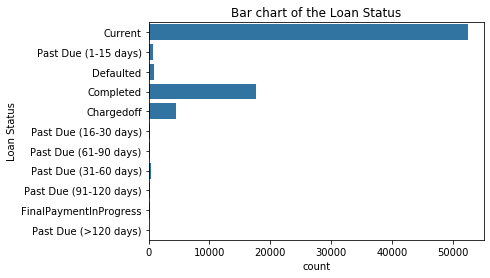

In [95]:
#visualising the loan Status Variables
base_color = sns.color_palette()[0]
sns.countplot(data=df_comp,y='LoanStatus',color=base_color);
plt.title('Bar chart of the Loan Status')
plt.ylabel('Loan Status');
#plt.xticks(rotation = 15);

#### we discover that out of the 77,557 entries up to 20,000 loans where completed,and over 50,000 are currently running

### Prosper Rating (Alpha)

In [46]:
# converting the "ProsperRating (Alpha)" to an orders categorical type
alpha = ['AA','A','B','C','D','E','HR']
pscore = pd.api.types.CategoricalDtype(ordered = True,categories = alpha)
df_comp['ProsperRating_Alpha'] = df_comp['ProsperRating (Alpha)'].astype(pscore)

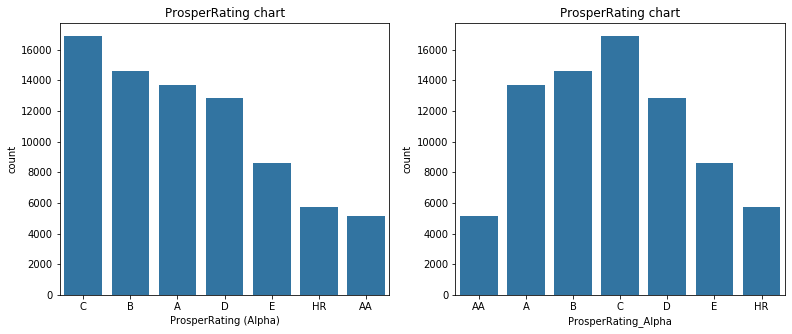

In [98]:
# bar plot of the ProsperRating (Alpha) 
plt.figure(figsize = (13, 5))

score_order = df_comp['ProsperRating (Alpha)'].value_counts().index
plt.subplot(1,2,1)
sns.countplot(data=df_comp,x='ProsperRating (Alpha)',color=base_color,
             order = score_order);
plt.title('ProsperRating chart')
plt.subplot(1,2,2)
sns.countplot(data=df_comp,x='ProsperRating_Alpha',color=base_color
             );
plt.title('ProsperRating chart');

#### The bulk of the loan fell within A,B,C,D 

### Borrower APR

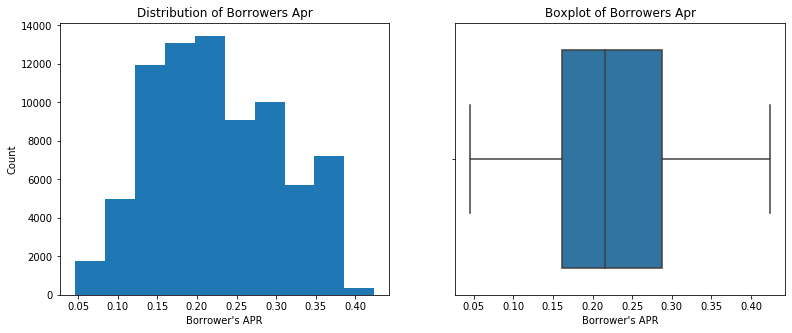

In [100]:
# distribution of borrowers' APRs 
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
plt.hist(data = df_comp, x = 'BorrowerAPR'); # histogram of lengths
plt.xlabel('Borrower\'s APR')
plt.ylabel('Count')
plt.title('Distribution of Borrowers Apr')
plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df_comp, x = 'BorrowerAPR') # box plot of lengths
plt.xlabel('Borrower\'s APR');
plt.title('Boxplot of Borrowers Apr');


#### the distribution above is a normal distribution of point with a median value between 0.20 and 0.25

### Lenders Yield

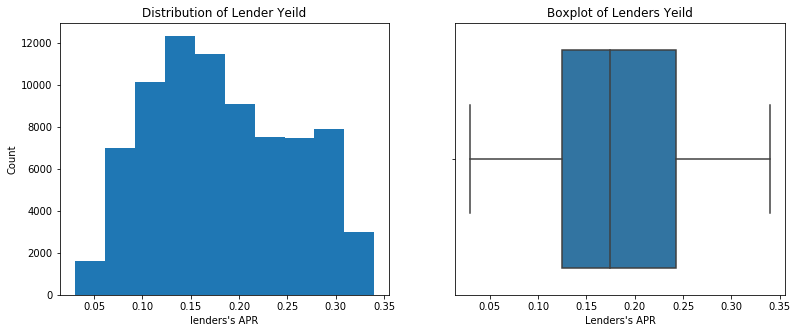

In [102]:
# distribution of Lendersyeild 
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
plt.hist(data = df_comp, x = 'LenderYield'); # histogram of lengths
plt.xlabel('lenders\'s APR')
plt.ylabel('Count')
plt.title('Distribution of Lender Yeild')
plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df_comp, x = 'LenderYield') # box plot of lengths
plt.xlabel('Lenders\'s APR');
plt.title('Boxplot of Lenders Yeild');


#### The distribution above is a normal distribution of point with a median value between 0.15 and 0.20

### Stated Monthly Income

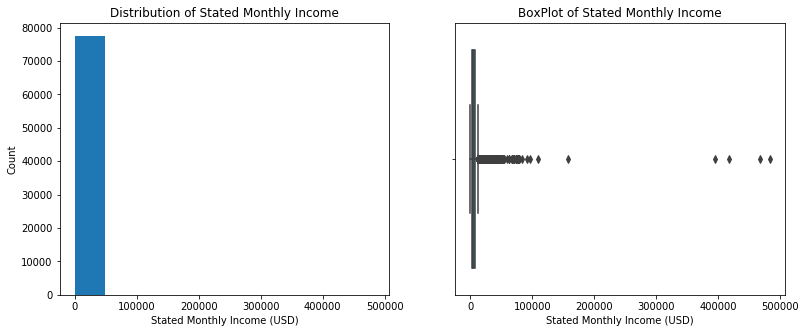

In [104]:
# distribution of Stated Monthly Income 
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
plt.hist(data = df_comp, x = 'StatedMonthlyIncome'); # histogram of lengths
plt.xlabel('Stated Monthly Income (USD)')
plt.ylabel('Count')
plt.title('Distribution of Stated Monthly Income')
plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df_comp, x = 'StatedMonthlyIncome') # box plot of lengths
plt.xlabel('Stated Monthly Income (USD)');
plt.title('BoxPlot of Stated Monthly Income');


#### The presense of oulies makes it difficult for us so see the actual structure of this variable so we need to replot with a bin size which does not include the outlier lke the 50,000 mark on the histogram

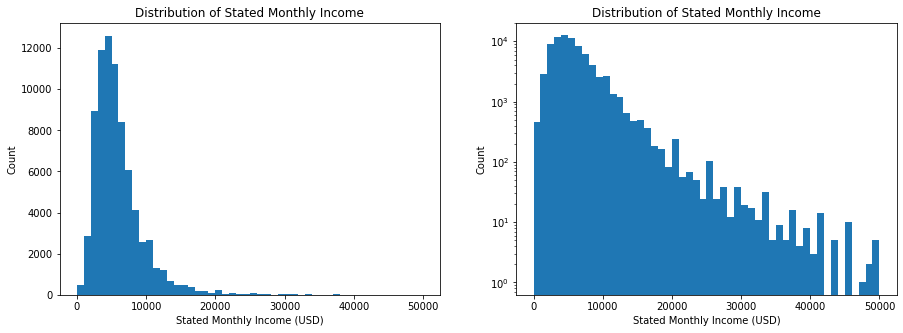

In [106]:
# investigting the StatedMonthlyIncome 
plt.figure(figsize = (15, 5))

bins = np.arange(0, 50000+1000, 1000)

plt.subplot(1,2,1)
plt.hist(data = df_comp, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Stated Monthly Income (USD)')
plt.ylabel('Count')
plt.title('Distribution of Stated Monthly Income')
plt.subplot(1,2,2)
plt.hist(data = df_comp, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Stated Monthly Income (USD)')
plt.ylabel('Count');
plt.yscale('log');
plt.title('Distribution of Stated Monthly Income');

#### The distribution of the borrowers' stated monthly incomes was right-skewed.majority of the listings were for borrowers with monthly incomes between 2,500 and 10,000.

### Eployment Status

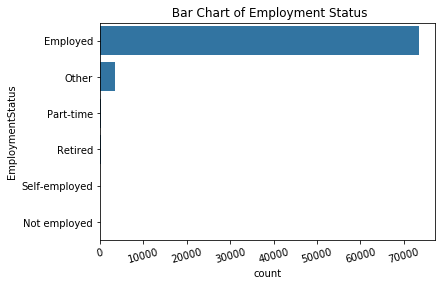

In [108]:
#Exploring Employment status
base_color = sns.color_palette()[0]
sns.countplot(data=df_comp,y='EmploymentStatus',color=base_color);
plt.xticks(rotation = 15) 
#plt.xlabel('Employment Status');
plt.title(' Bar Chart of Employment Status');

In [54]:
# The percentage of the employed variable
len(df_comp[(df_comp["EmploymentStatus"] == 'Employed' )])/df_comp.shape[0]

0.9472903799785964

From Our Plot above the number of people who applied are employed they amount for 94% of our data 

### Loan original Amount

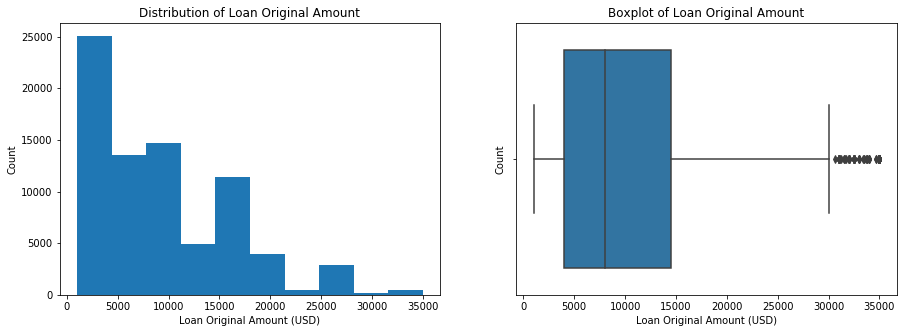

In [109]:
# investigting the Loan Original Amount variable
plt.figure(figsize = (15, 5))

# bins = np.arange(0, 50000+1000, 1000)

plt.subplot(1,2,1)
plt.hist(data = df_comp, x = 'LoanOriginalAmount')#, bins = bins)
plt.xlabel('Loan Original Amount (USD)')
plt.ylabel('Count')
plt.title('Distribution of Loan Original Amount')
plt.subplot(1,2,2) 
sns.boxplot(data = df_comp, x = 'LoanOriginalAmount') # box plot of lengths
plt.xlabel('Loan Original Amount (USD)');
plt.ylabel('Count');
plt.title('Boxplot of Loan Original Amount');


the histogram is right skewwed with  a decrease in frequency as the loan amount increased,From the box plot of the we can see the center observed at approximately $7,000. 

### Term

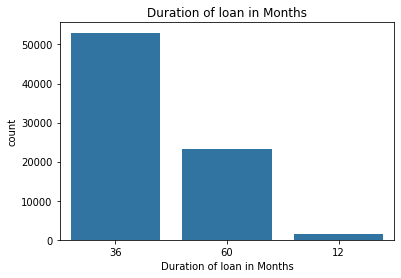

In [110]:
term_order = df_comp.Term.value_counts().index
sns.countplot(data=df_comp,x='Term',color= base_color,order = term_order)
plt.xlabel('Duration of loan in Months');
plt.title('Duration of loan in Months');

In [57]:
len(df_comp[(df_comp["Term"] == 36 )])/df_comp.shape[0]

0.6833683613342445

##### From the bar plot we see that many loan applicant stated that they will payup their loans in 36 months which is 68%

### Listing Category

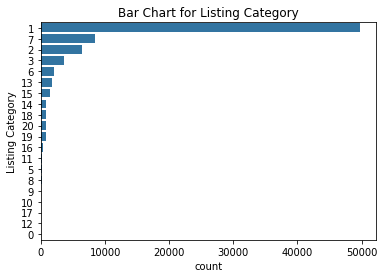

In [111]:
list_order = df_comp['ListingCategory (numeric)'].value_counts().index
base_color = sns.color_palette()[0]
sns.countplot(data=df_comp,y='ListingCategory (numeric)',color=base_color,order = list_order);
#plt.xlabel('ProsperScore')
plt.ylabel('Listing Category');
#plt.xticks(rotation = 15)
plt.title('Bar Chart for Listing Category');

The majority of the people that request for loans stated that the needed the money for 
- 1 - Debt Consolidation 
- 7 - Other
- 2 - Home Improvement
- 3 - Business
- 6 - Auto

we limit the area  of intrest the bove listed 5 categories

In [59]:
list_cat = {1:'Debt Consolidation',2:'Home Improvement',3:'Business',6:'Auto',7:'Others'}
def replace_cat(x):
    if x == 1:
        return list_cat[1] # Debt Consolidation
    elif x == 2:
        return list_cat[2] # Home Improvement
    elif x == 3:
        return list_cat[3] # Business
    elif x == 6:
        return list_cat[6] # Auto
    else:
        return list_cat[7] # Other

# apply custom function and list loan type description under a new column 
df_comp['LoanType'] = df_comp['ListingCategory (numeric)'].apply(replace_cat)


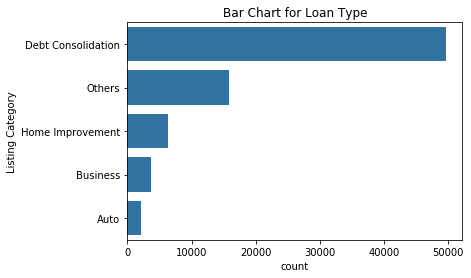

In [112]:
list_order = df_comp['LoanType'].value_counts().index
base_color = sns.color_palette()[0]
sns.countplot(data=df_comp,y='LoanType',color=base_color,order = list_order);
#plt.xlabel('ProsperScore')
plt.ylabel('Listing Category');
#plt.xticks(rotation = 15)
plt.title('Bar Chart for Loan Type');

### Monthly Loan Payment

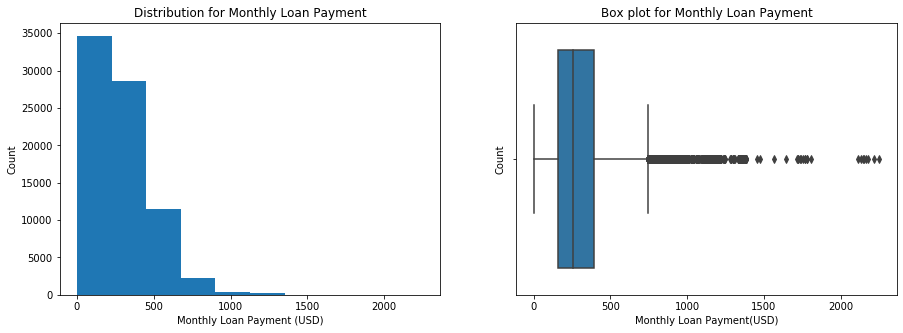

In [114]:
# investigting the Monthly Loan Payment variable
plt.figure(figsize = (15, 5))

# bins = np.arange(0, 50000+1000, 1000)

plt.subplot(1,2,1)
plt.hist(data = df_comp, x = 'MonthlyLoanPayment')#, bins = bins)
plt.xlabel('Monthly Loan Payment (USD)')
plt.ylabel('Count')
plt.title('Distribution for Monthly Loan Payment');
plt.subplot(1,2,2) 
sns.boxplot(data = df_comp, x = 'MonthlyLoanPayment') # box plot of lengths
plt.xlabel('Monthly Loan Payment(USD)');
plt.ylabel('Count');
plt.title('Box plot for Monthly Loan Payment');


#####  The monthly loan payment is  right skewed 

In [62]:
df_comp['MonthlyLoanPayment'].describe()

count    77557.000000
mean       295.754619
std        189.327595
min          0.000000
25%        158.490000
50%        256.390000
75%        392.280000
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

### Debt to income Ratio

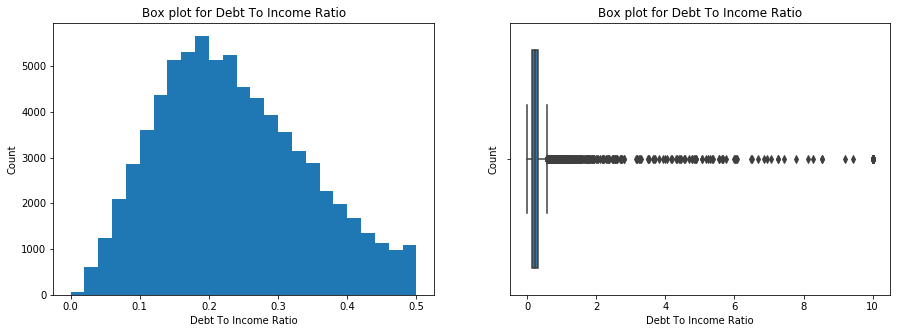

In [115]:
# investigting the Debt to income ratio variable
plt.figure(figsize = (15, 5))

bins = np.arange(0, 0.5+0.02, 0.02)

plt.subplot(1,2,1)
plt.hist(data = df_comp, x = 'DebtToIncomeRatio',bins = bins)
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Count')
plt.title('Box plot for Debt To Income Ratio')
plt.subplot(1,2,2) 
sns.boxplot(data = df_comp, x = 'DebtToIncomeRatio') # box plot of lengths
plt.xlabel('Debt To Income Ratio');
plt.ylabel('Count');
plt.title('Box plot for Debt To Income Ratio');

#### because of the ouliers i used a bin using the quatiles of the distribution and the outcome is a normal ditribution


In [64]:
df_comp['DebtToIncomeRatio'].describe()

count    77557.000000
mean         0.258752
std          0.318326
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

### TotalProsperLoans 

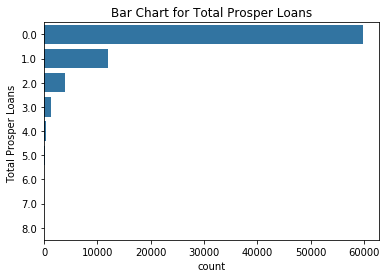

In [116]:
#though TotalProsperLoans is has numeric values but it atually a categorical variable
base_color = sns.color_palette()[0]
sns.countplot(data=df_comp,y='TotalProsperLoans',color=base_color);
#plt.xlabel('ProsperScore')
plt.ylabel('Total Prosper Loans ');
#plt.xticks(rotation = 15);
plt.title('Bar Chart for Total Prosper Loans');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Aproximately 33% of loans has been completed from our bar chart but we will investedgate futher 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


> I also replaced the the Prosper score with the wrong value with the median , so as not to drop any columns

> I converter all Full-time employment status to "Employed'


## Bivariate Exploration

> I will begin by see if there actually is a relationship between various variables in predicting the Loan Status
below are the varaibles
- **LenderYield**:Numeric
- **StatedMonthlyIncome**:Numeric
- **LoanOriginalAmount**:Numerical
- **Term**:Categorical
- **MonthlyLoanPayment**:Numeric
- **LoanType** categorical
- **ProsperRating_Alpha** categorical
- **LoanStatus** categorical
- **TotalProsperloan** numerice


In [66]:
numeric_vars=['LenderYield','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment','BorrowerAPR']
categoric_vars = ['Term','ProsperRating_Alpha','LoanType','LoanStatus']

In [67]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77557 entries, 1 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ListingNumber              77557 non-null  int64   
 1   ListingCategory (numeric)  77557 non-null  int64   
 2   BorrowerAPR                77557 non-null  float64 
 3   LenderYield                77557 non-null  float64 
 4   ProsperScore               77557 non-null  float64 
 5   StatedMonthlyIncome        77557 non-null  float64 
 6   EmploymentStatus           77557 non-null  object  
 7   Term                       77557 non-null  int64   
 8   LoanStatus                 77557 non-null  object  
 9   ProsperRating (Alpha)      77557 non-null  object  
 10  LoanOriginalAmount         77557 non-null  int64   
 11  TotalProsperLoans          77557 non-null  float64 
 12  DebtToIncomeRatio          77557 non-null  float64 
 13  MonthlyLoanPayment         775

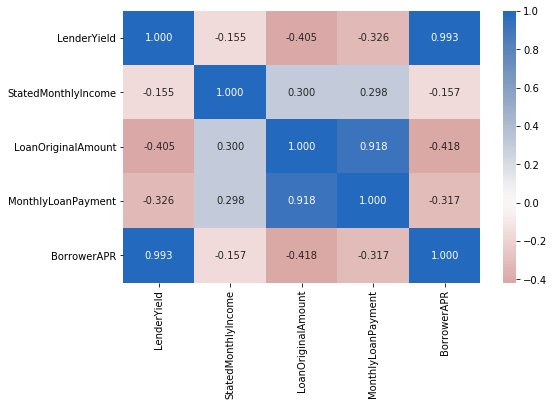

In [68]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df_comp[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

> there is  a high corellation between 
- loan original amount and monthlyloanpayment
- lenderYield and BorrowerApr

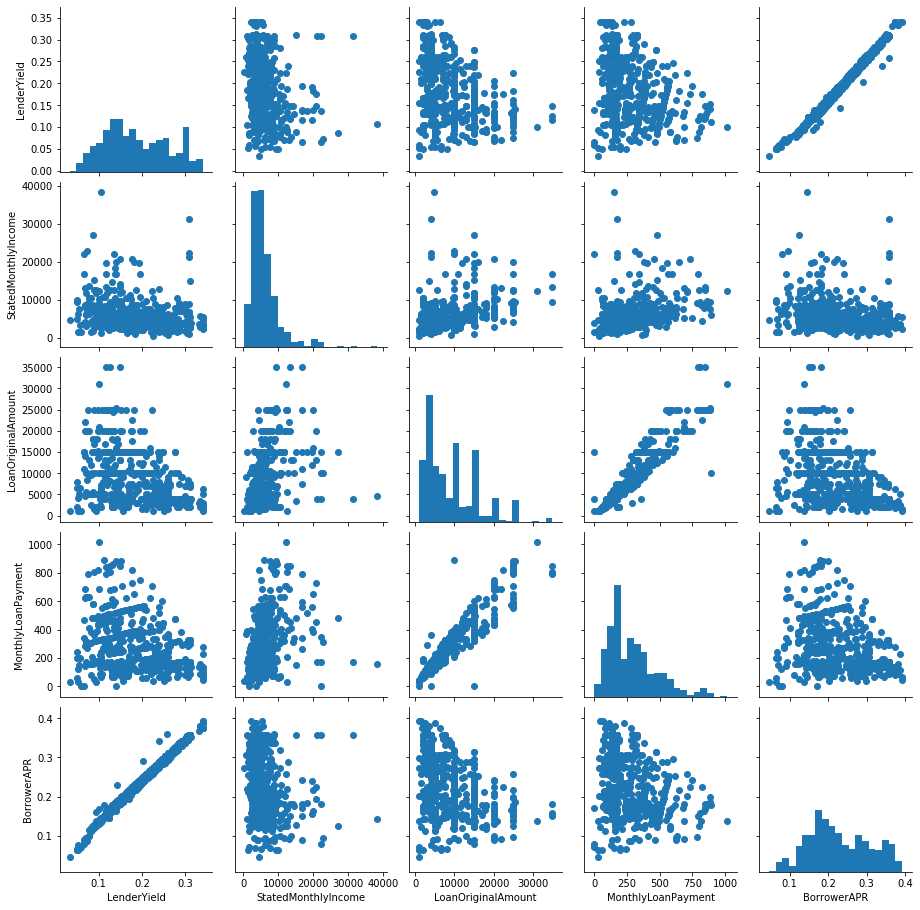

In [69]:
# plot matrix: sample 10000 loans so that plots are clearer and
# they render faster

df_samp = df_comp.sample(10000)

g = sns.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

we see a strong relationship between the loan original amount and the monthly laon payment,  the lendersyeild and borrowerApr i will investibate futhere to see how it affects the loan status

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x864 with 0 Axes>

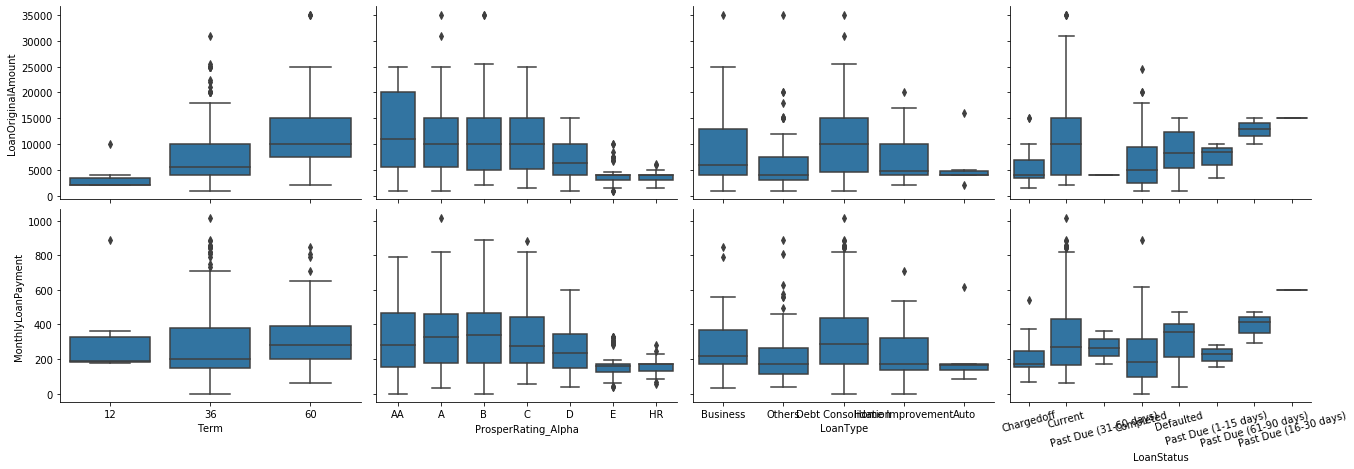

In [70]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

#
def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)
    
plt.figure(figsize = [10, 12])
g = sns.PairGrid(data = df_samp, y_vars = ['LoanOriginalAmount', 'MonthlyLoanPayment'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation = 15)
plt.show();


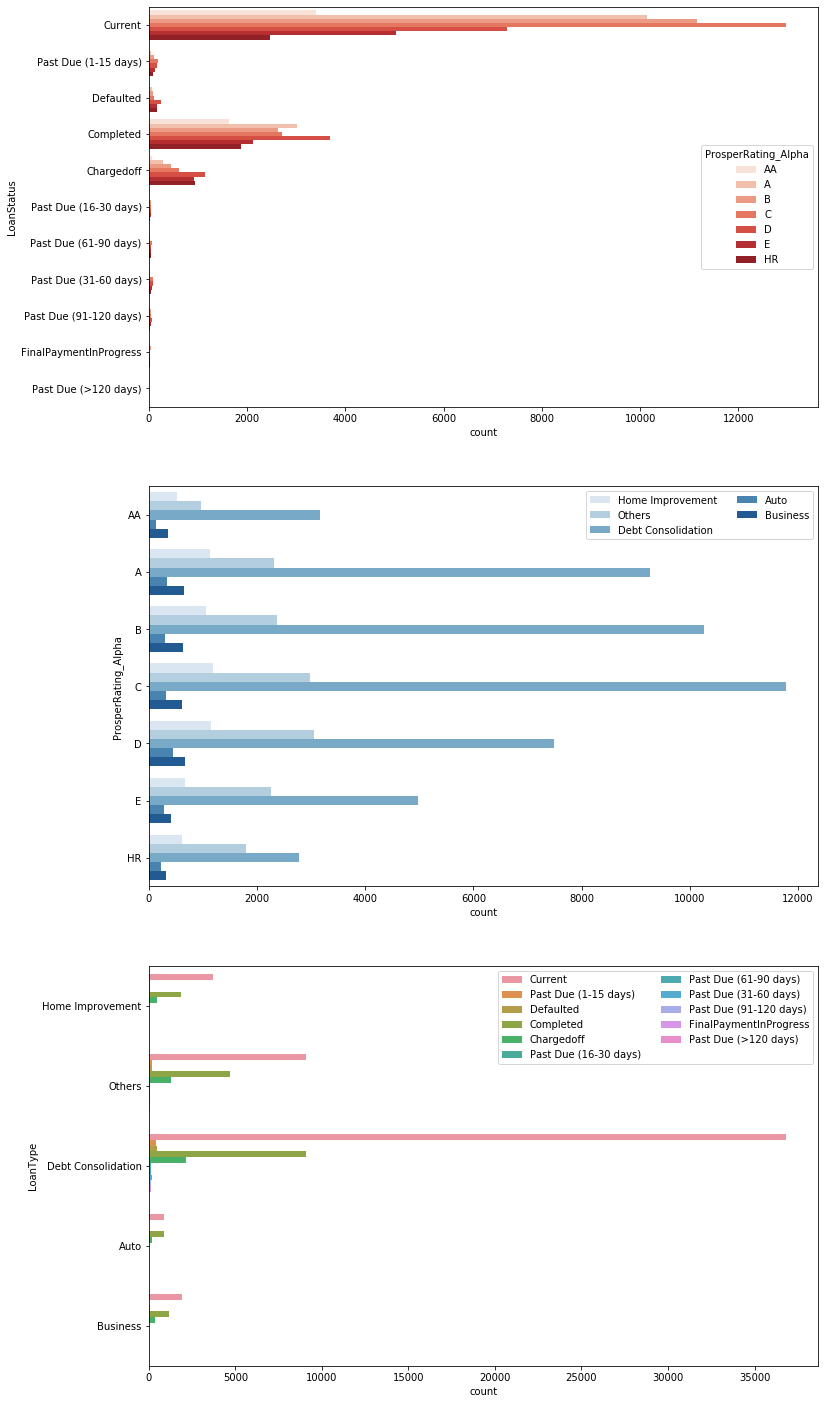

In [71]:
# crating a bar chart for the categorical variable
plt.figure(figsize = [12, 25])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sns.countplot(data = df_comp, y = 'LoanStatus', hue = 'ProsperRating_Alpha', palette = 'Reds')
#ax.legend(loc = 1, ncol = 3)

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sns.countplot(data = df_comp, y = 'ProsperRating_Alpha', hue = 'LoanType', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sns.countplot(data = df_comp, y = 'LoanType', hue = 'LoanStatus')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

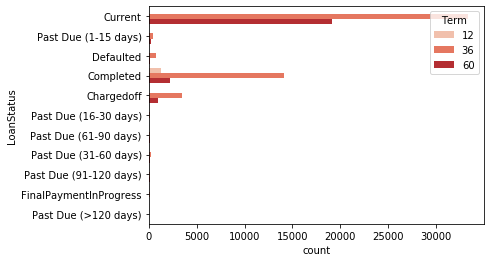

In [72]:
# checking status for loan type and term
sns.countplot(data = df_comp, y = 'LoanStatus', hue = 'Term', palette = 'Reds');

completed loans had terms set to 36 months

> Majority of the completed loans have a proper score of category "D"

> Debt consolidtion was the main pupose why applicants applied and majority fell in proper score category   "C"

> compared to the other reasons for aquiring the loan more applicants who listed the reason for the loan as debtconsolidtion have completed their loans

- keypoint:
    - Prosperrting_Alpha:  "D" & 'C'
    - Loantype: "Debtconsolidation"
    

#### Loan Original Amount vs MonthlyLoanPayment

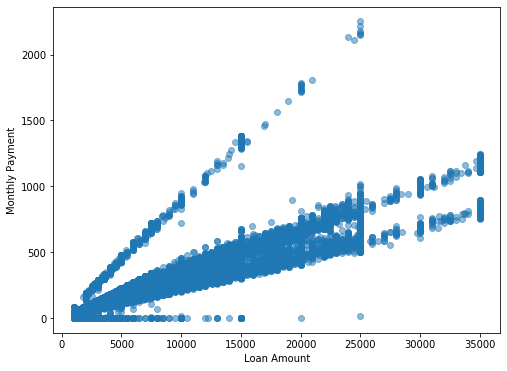

In [73]:
# scatter plot of LoanOriginalAmount vs. MonthlyLoanPayment, with log transform on price axis

plt.figure(figsize = [8, 6])
plt.scatter(data = df_comp, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', alpha = 0.5)
#plt.xlim([0, 3.5])
plt.xlabel('Loan Amount')
#plt.yscale('log')
#plt.yticks([0,500, 1e3, 2e3, 5e3, 1e4, 2e4], [0,500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Monthly Payment')
plt.show()

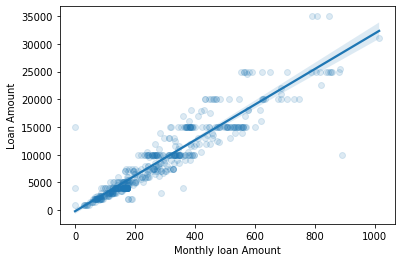

In [74]:

sns.regplot(data = df_samp, x = 'MonthlyLoanPayment',y = 'LoanOriginalAmount',x_jitter =0.5,
           scatter_kws ={'alpha':0.15});
plt.xlabel('Monthly loan Amount')
plt.ylabel('Loan Amount');

#### LoanOriginalAmount vs LoanStatus

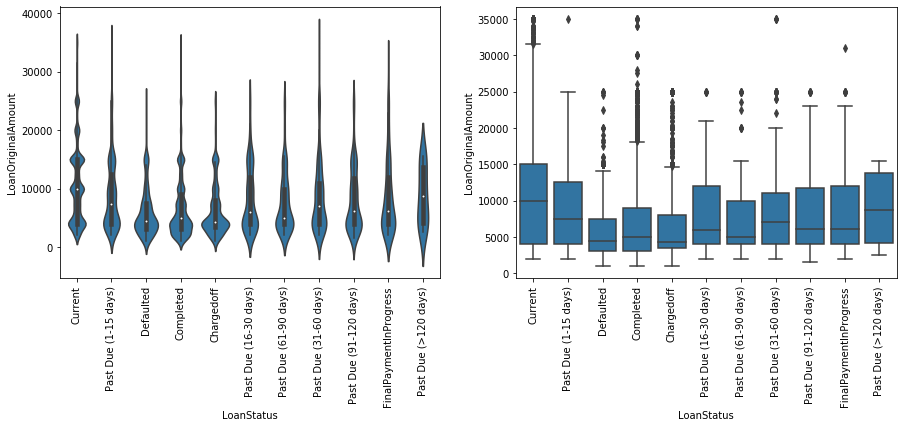

In [75]:
plt.figure(figsize = [15,5])
base_color = sns.color_palette()[0]

plt.subplot(1,2,1)
sns.violinplot(data=df_comp,y = 'LoanOriginalAmount',x = 'LoanStatus',color =base_color);
plt.xticks(rotation =90);

plt.subplot(1,2,2)
sns.boxplot(data=df_comp,y = 'LoanOriginalAmount',x = 'LoanStatus',color =base_color);

plt.xticks(rotation =90);

we see that the range of loansOriginal amount for  completed loans falls in the range of 2500usd and 7500usd whis is less than 10,000usd

#### MonthlyLoanPayment vs LoanStatus

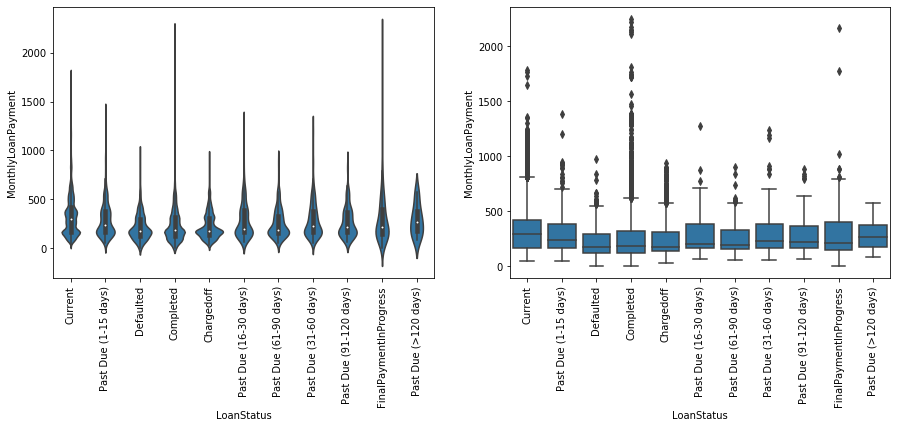

In [76]:
plt.figure(figsize = (15, 5))

base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.violinplot(data=df_comp,y = 'MonthlyLoanPayment',x = 'LoanStatus',color =base_color);
plt.xticks(rotation =90)
           
plt.subplot(1,2,2)
sns.boxplot(data=df_comp,y = 'MonthlyLoanPayment',x = 'LoanStatus',color =base_color);

plt.xticks(rotation =90);

we can  values of the monthly payment plan for completed loans to be between  200usd and 400usd though its thesam trens across a loan status

#### MonthlyLoanPayment vs StatedMonthlyIncome

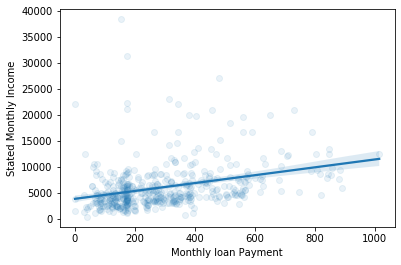

In [77]:
sns.regplot(data = df_samp, x = 'MonthlyLoanPayment',y = 'StatedMonthlyIncome',x_jitter =0.5,
           scatter_kws ={'alpha':0.09});
plt.xlabel('Monthly loan Payment')
plt.ylabel('Stated Monthly Income');

we see a weak positive relationship , but i can be noticed tht as the stated monthly income increases so does the monthly loan payment amount

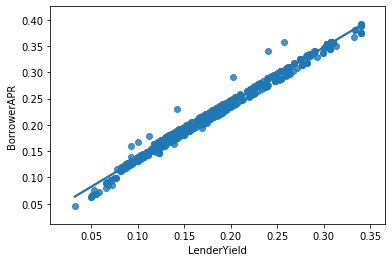

In [78]:

sns.regplot(data=df_samp,x = 'LenderYield',y = 'BorrowerAPR');
#plt.xticks(rotation =15)

We See a Positive relationship between the lenders yeild and the borrowers apr

#### ProperRating _Alpha vs lenderYield

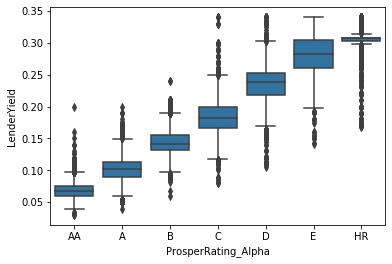

In [79]:
base_color = sns.color_palette()[0]
sns.boxplot(data=df_comp,x = 'ProsperRating_Alpha',y = 'LenderYield',color =base_color);
#plt.xticks(rotation =15)

here we see an incresing lenderYeild from low risk to  high risk, from our previous anlysis, the proper rating with the highest completed is "D" and it falls within the lenderyeild rannge of 0.22 and 0.30 

#### LoanStatus vs LenderYield

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

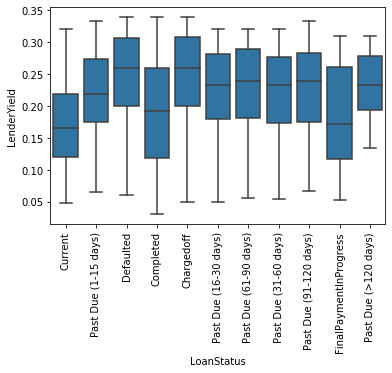

In [268]:
base_color = sns.color_palette()[0]
sns.boxplot(data=df_comp,x = 'LoanStatus',y = 'LenderYield',color =base_color);
plt.xticks(rotation =90);

from our plot we see that the completed lons falls withing the LenderYield ranged of 0.13 and 0.25 wchic coinsides with Prosper rating_ Alpha "C" & "D" falles into that range 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> For my varable of intrest which is the loanStatus i discovered the ranges of values for the following that could hep predict a loan that will be completed as at when due
- ProsperRating_Alpha : **C or D**
- LendersYeild: between **0.13 and 0.25**
- MonthlyLoanpayment: between **200usd and 400usd**
- LoanOriginalAmount: between **2500usd and 75000usd**

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I discovered  weak but positive relationship between the stated monthly income and the monthly payment amount that was quit intresting to note

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the loanStatus relates with Lenders yeild,the monthlypaymentamount,prosper rating and LoanOriginalAmount

In [80]:
#breaking down the loan status column into fewer categories
df_comp['LoanStatus'].value_counts()

Current                   52478
Completed                 17703
Chargedoff                 4445
Defaulted                   885
Past Due (1-15 days)        722
Past Due (31-60 days)       327
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       242
FinalPaymentInProgress      189
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

In [81]:
#Craeting a new column and called loanstatusB where there will be just 5 categories
list_stat = ['Current','Completed','Chargedoff','Defaulted']
def replace_stat(x):
    if x in list_stat:
        return x 
    elif x == 'FinalPaymentInProgress':
        return 'In Progress' # Home Improvement
    else:
        return 'Past Due' # Home Improvement
   
#applying custom function ato the LoanStatus column 
df_comp['LoanStatus_B'] = df_comp['LoanStatus'].apply(replace_stat)


In [82]:
df_comp['LoanStatus_B'].value_counts()

Current        52478
Completed      17703
Chargedoff      4445
Past Due        1857
Defaulted        885
In Progress      189
Name: LoanStatus_B, dtype: int64

In [84]:
df_sample = df_comp.sample(500)

In [85]:
df_sample['LoanStatus_B'].value_counts()

Current       352
Completed     112
Chargedoff     18
Past Due       14
Defaulted       4
Name: LoanStatus_B, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


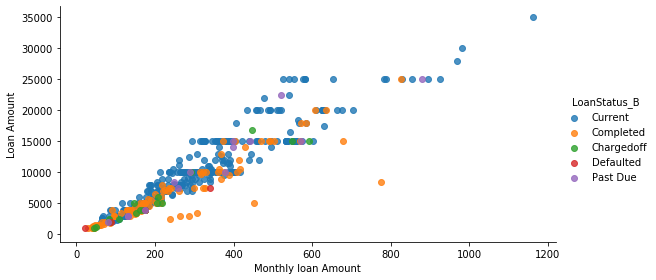

In [86]:
g = sns.FacetGrid(data =df_sample,hue = 'LoanStatus_B',size =4, aspect = 2)
g = g.map(sns.regplot,'MonthlyLoanPayment','LoanOriginalAmount',x_jitter= 0.04,fit_reg = False);
g.add_legend()
plt.xlabel('Monthly loan Amount (USD)')
plt.ylabel('Loan Amount (USD)');

In the above plot see That Majority of the completed loans falls under the 10,000 usd mark along the Loan Amount axis and below the 400usd mark along the Monthy loan Amount axis, so can conclude that 
to predict a loan that that will lead to a completed loan status the following must hold
- 1, Borrowers loan Amount must be < 10,000usd 
- 2, Borrowers Monthly Loan Amount  must be < 400usd per month

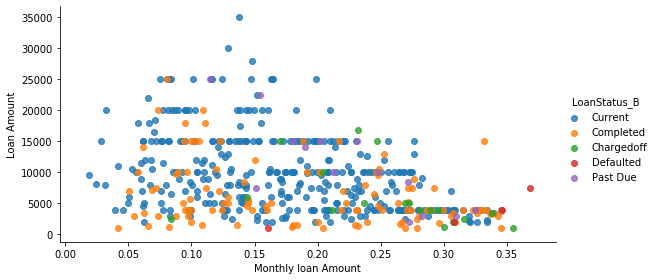

In [87]:
g = sns.FacetGrid(data =df_sample,hue = 'LoanStatus_B',size =4, aspect = 2)
g = g.map(sns.regplot,'LenderYield','LoanOriginalAmount',x_jitter= 0.04,fit_reg = False);
g.add_legend()
plt.xlabel('Lenders Yield (USD)')
plt.ylabel('Loan Amount');

From the above plot see thesame trend as before where majority of the completed loans falls below the 10,000usd loan amount But one extra infomation is the range in which the Lenders Yeild falls which is 0.10 and 0.30 so we can conclude that this third parameter should hold in addition to the above 2

- 3, Lenders Yield should be between 0.10 and 0.30


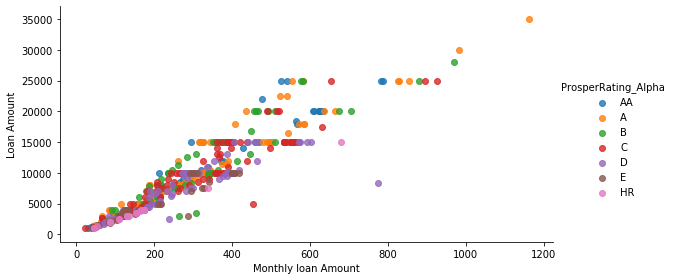

In [88]:
g = sns.FacetGrid(data =df_sample,hue = 'ProsperRating_Alpha',size =4, aspect = 2)
g = g.map(sns.regplot,'MonthlyLoanPayment','LoanOriginalAmount',x_jitter= 0.09,fit_reg = False);
g.add_legend()
plt.xlabel('Monthly loan Amount (USD)')
plt.ylabel('Loan Amount (USD)');

here we see a fourth patameter that can guide us to make the right choice, should parameter 1 and 2 hold we notice from the above visiualisation a saturation of loans with Prosper rating of C and D with loanAmount and MonthlyloanAmount
Range

- 4, Prosperating C or D is Prefered

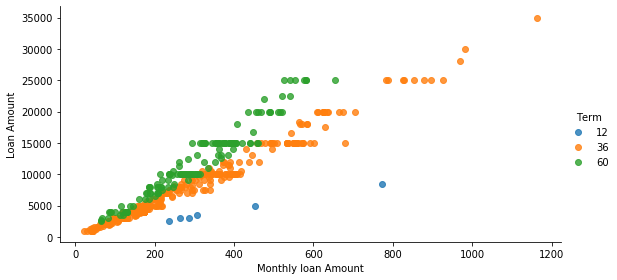

In [89]:
g = sns.FacetGrid(data =df_sample,hue = 'Term',size =4, aspect = 2)
g = g.map(sns.regplot,'MonthlyLoanPayment','LoanOriginalAmount',x_jitter= 0.09,fit_reg = False);
g.add_legend()
plt.xlabel('Monthly loan Amount (USD)')
plt.ylabel('Loan Amount (USD)');

This visualisation clealy shows ud our fifth parameter that will guild us make the best choice

- 5, Loan Term should be 36 month  option

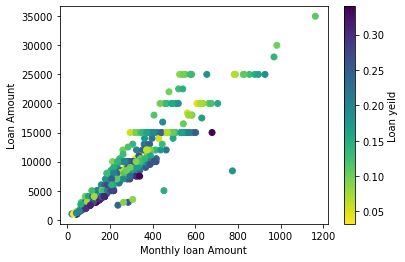

In [90]:
plt.scatter(data =df_sample,x ='MonthlyLoanPayment',y ='LoanOriginalAmount',c = 'LenderYield',
            cmap = 'viridis_r' )
plt.colorbar(label = 'Loan yeild')
g.add_legend()
plt.xlabel('Monthly loan Amount(USD)')
plt.ylabel('Loan Amount (USD)');

Taking a look at Our colour bar and comparing it with our Fouth parameter we stated above we see that it confirms our Lender Yeild Range inline with the Loan Amount and the Monthly Loan Amount

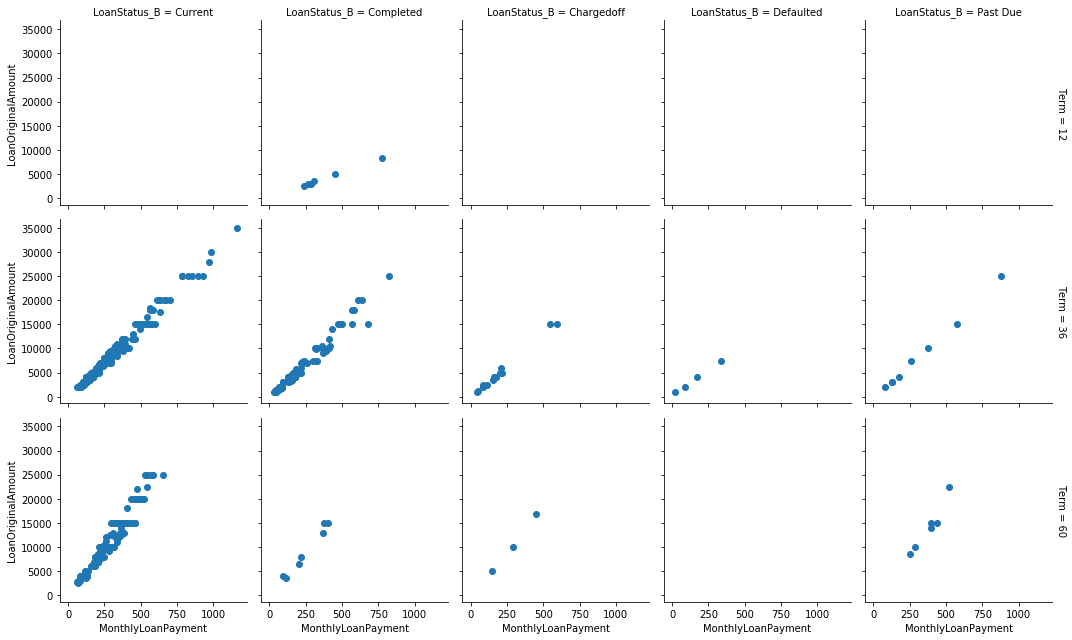

In [93]:
g = sns.FacetGrid(data =df_sample,col = 'LoanStatus_B',row = 'Term',margin_titles = True)
g.map(plt.scatter,'MonthlyLoanPayment','LoanOriginalAmount')

we can see that considering all our four parameters in the previous  cells above, they all align when looking at the above Visualisation

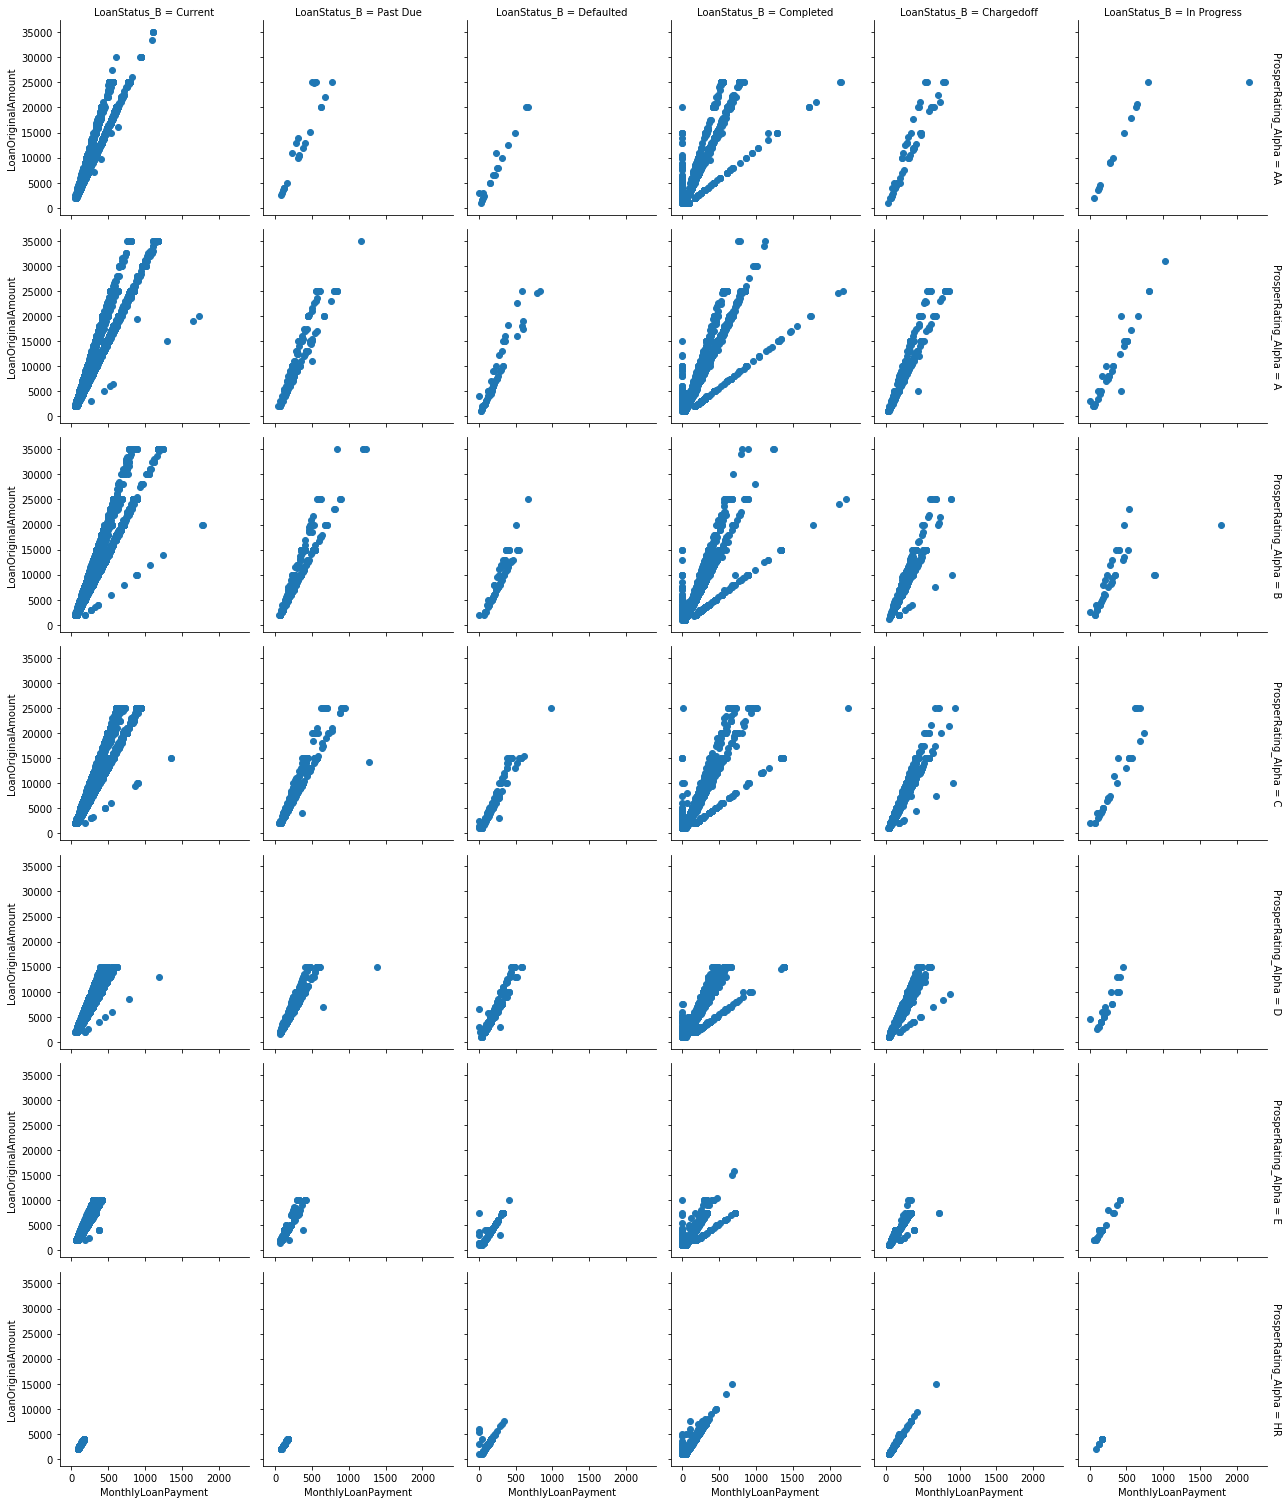

In [94]:
g = sns.FacetGrid(data =df_comp,col = 'LoanStatus_B',row = 'ProsperRating_Alpha',margin_titles = True)
g.map(plt.scatter,'MonthlyLoanPayment','LoanOriginalAmount')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The below parameter showed via relationship the the above visualisation  hold  can hep predict a loan Status Of Completed

- 1, Borrowers loan Amount must be < 10,000usd 
- 2, Borrowers Monthly Loan Amount  must be < 400usd per month
- 3, Lenders Yield should be between 0.10 and 0.30
- 4, Prosperating C or D is Prefered
- 5, Loan Term should be 36 month  option

### Were there any interesting or surprising interactions between features?

> the relationship between the completed loan status decreased with the increase in the proper rating from low risk to high risk